**Atualizando a biblioteca para plotagem de gráficos**


In [ ]:
!pip -q install plotly --upgrade
!pip -q install yellowbrick

**Importando bibliotecas**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

**Abrindo um arquivo CSV do drive**

In [ ]:
base = pd.read_csv('/content/sample_data/fifa.csv', ';')

<ipython-input-122-f15872d65b8b>:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  base = pd.read_csv('/content/sample_data/fifa.csv', ';')


In [ ]:
base

,age,height_cm,weight_kg,overall,skill_moves,pace,shooting,passing,dribbling,defending,physic
0,30,180,80,90,4,93,86,83,92,32,64
1,32,195,95,90,4,76,91,81,86,34,86
2,23,173,74,88,4,90,82,84,91,32,64
3,30,187,71,88,4,74,90,82,83,33,68
4,29,183,79,88,3,61,81,85,82,78,80
...,...,...,...,...,...,...,...,...,...,...,...
13753,17,187,81,41,2,66,25,29,30,39,53
13754,17,178,57,41,3,64,41,27,35,27,41
13755,18,190,76,40,2,58,27,35,31,52,68
13756,22,180,70,40,2,72,27,27,30,35,61


**Balanceando a Base**

In [ ]:
X_prev = base.iloc[:, 0:11].values
y_classe = base.iloc[:, 3].values

In [ ]:
X_prev

array([[ 30, 180,  80, ...,  92,  32,  64],
       [ 32, 195,  95, ...,  86,  34,  86],
       [ 23, 173,  74, ...,  91,  32,  64],
       ...,
       [ 18, 190,  76, ...,  31,  52,  68],
       [ 22, 180,  70, ...,  30,  35,  61],
       [ 41, 175,  72, ...,  45,  31,  33]])

**Contando quantidade de instâncias**


In [ ]:
np.unique(y_classe, return_counts=True)

(array([40, 41, 42, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57,
        58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74,
        75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 90]),
 array([  3,   2,   2,   4,  13,  23,  50,  48, 109, 124, 155, 218, 231,
        302, 293, 391, 441, 528, 550, 737, 654, 738, 808, 888, 805, 732,
        730, 692, 517, 477, 403, 405, 341, 325, 234, 185, 138, 116,  97,
         74,  51,  40,  30,  17,  11,  12,   7,   5,   2]))

**Quantidade**

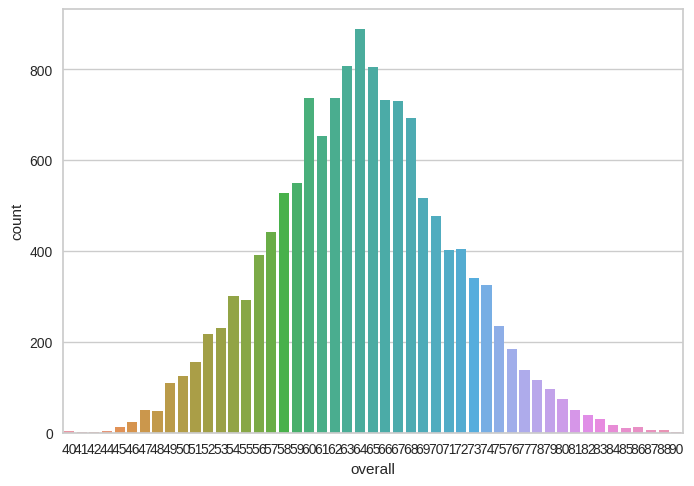

In [ ]:
sns.countplot(x = base['overall']);

**Depois:**

**Separando os atributos de entrada e de classe**

In [ ]:
X_prev_label = base.iloc[:, [0, 1, 2, 4, 5, 6, 7, 8, 9, 10]]

In [ ]:
X_prev_label

,age,height_cm,weight_kg,skill_moves,pace,shooting,passing,dribbling,defending,physic
0,30,180,80,4,93,86,83,92,32,64
1,32,195,95,4,76,91,81,86,34,86
2,23,173,74,4,90,82,84,91,32,64
3,30,187,71,4,74,90,82,83,33,68
4,29,183,79,3,61,81,85,82,78,80
...,...,...,...,...,...,...,...,...,...,...
13753,17,187,81,2,66,25,29,30,39,53
13754,17,178,57,3,64,41,27,35,27,41
13755,18,190,76,2,58,27,35,31,52,68
13756,22,180,70,2,72,27,27,30,35,61


In [ ]:
y_classe

array([90, 90, 88, ..., 40, 40, 40])

In [ ]:
X_prev.shape

(13758, 11)

**Método de amostragem Holdout**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
y_classe.shape

(13758,)

In [ ]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X_prev, y_classe, test_size=0.3, random_state=42, stratify=y_classe)

In [ ]:
X_treino.shape, X_teste.shape

((9630, 11), (4128, 11))

**Vamos experimentar agora o algoritmo Decision Tree?**

In [ ]:
modelo = RandomForestClassifier(n_estimators=10, max_features='auto', criterion='gini', random_state = 42)
Y = modelo.fit(X_treino, y_treino)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


**Vamos testar o modelo?**

In [ ]:
previsoes = modelo.predict(X_teste)

**Será se o modelo acertou?**

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_teste,previsoes)

0.9212693798449613

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
confusion_matrix(y_teste, previsoes)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

0.9212693798449613

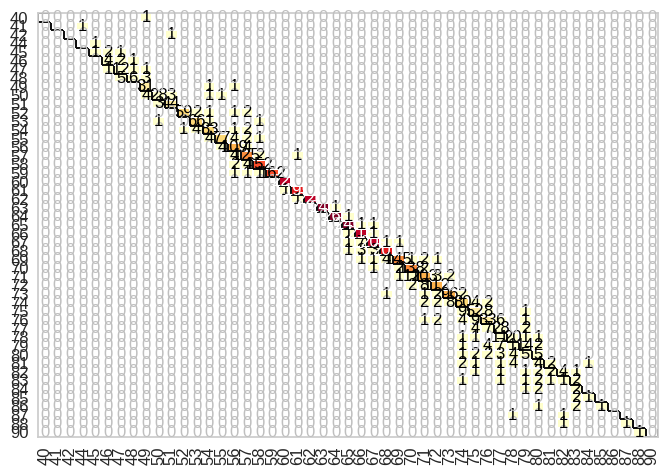

In [ ]:
cm = ConfusionMatrix(modelo)
cm.fit(X_treino, y_treino)
cm.score(X_teste, y_teste)

In [ ]:
print(classification_report(y_teste, previsoes))

              precision    recall  f1-score   support

          40       0.00      0.00      0.00         1
          41       0.00      0.00      0.00         1
          42       0.00      0.00      0.00         1
          44       0.00      0.00      0.00         1
          45       0.50      0.25      0.33         4
          46       0.57      0.57      0.57         7
          47       0.60      0.80      0.69        15
          48       0.75      0.43      0.55        14
          49       0.78      0.94      0.85        33
          50       0.88      0.76      0.81        37
          51       0.92      0.94      0.93        47
          52       0.98      0.91      0.94        65
          53       0.92      0.96      0.94        69
          54       0.91      0.91      0.91        91
          55       0.94      0.88      0.91        88
          56       0.89      0.93      0.91       117
          57       0.89      0.95      0.92       132
          58       0.97    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **Vamos ver os atributos que o Random considerou como mais importantes?**

In [ ]:
print(modelo.feature_importances_)

[0.03306797 0.03404989 0.03505775 0.58557399 0.00763203 0.04274659
 0.05246457 0.04747328 0.04942533 0.06700021 0.0455084 ]


<Axes: >

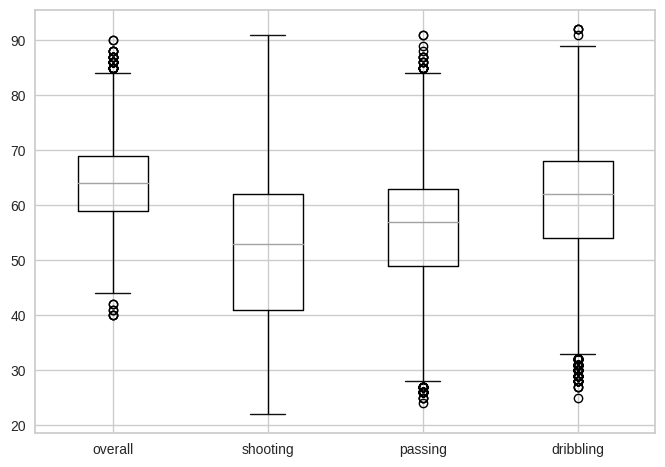

In [ ]:
import matplotlib.pyplot as plt
base.boxplot(column=['overall','shooting','passing','dribbling'])